**Missing Values Ratio**

Filter out columns in the Melbourne housing dataset where more than 20% of values are missing, and determine the impact on a price prediction model's performance.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"Melbourne_housing.csv")


# Display basic info
print("Initial Shape of the Data:", df.shape)
print("Missing Values in Each Column:\n", df.isnull().sum())

# Filter out columns where more than 20% of values are missing
missing_threshold = 20
missing_ratio = df.isnull().mean() * 100
filtered_data = df.loc[:, missing_ratio <= missing_threshold]

# Display the shape after filtering
print("\nShape after filtering out columns with >20% missing values:", filtered_data.shape)

Initial Shape of the Data: (34857, 20)
Missing Values in Each Column:
 Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Shape after filtering out columns with >20% missing values: (34857, 11)


**High Correlation filter**

Remove highly correlated features (correlation > 0.85) from the Melbourne housing dataset and evaluate the effect on the prediction of property prices

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Melbourne_housing.csv")

# Handle missing values by dropping rows with missing values
df_cleaned = df.dropna()

# Remove non-numeric columns before calculating the correlation matrix
df_numeric = df_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
correlation_matrix = df_numeric.corr()

# Identify and remove highly correlated features (correlation > 0.85)
threshold = 0.85
high_corr_features = np.where(correlation_matrix > threshold)

# Find pairs of highly correlated features
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_features) if x != y and x < y]

print("Highly correlated features (correlation > 0.85):\n", high_corr_pairs)

# Remove one feature from each highly correlated pair
features_to_remove = set([pair[1] for pair in high_corr_pairs])
df_reduced = df_cleaned.drop(columns=features_to_remove)

# Convert categorical variables into numerical values using OneHotEncoder
df_reduced = pd.get_dummies(df_reduced, drop_first=True)

# Define features (X) and target (y)
X = df_reduced.drop(columns=['Price'])
y = df_reduced['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Highly correlated features (correlation > 0.85):
 [('Rooms', 'Bedroom2')]
Mean Squared Error: 1.036921744580112e+24
R-squared: -2698831465071.9956


**Low Variance Filter**

In [12]:
# Handle missing values by dropping rows with missing values
df_cleaned = df.dropna()
# Convert categorical variables into numerical values using OneHotEncoder or get_dummies
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']
# Calculate variance of all features
feature_variances = X.var()
# print("Variance of features before filtering:")
# print(feature_variances)

# Apply Variance Threshold (Filter out features with variance below the threshold, e.g., 0.01)
variance_threshold = VarianceThreshold(threshold=0.01)
X_high_variance = variance_threshold.fit_transform(X)
# Get the indices of the features that were kept and removed
features_kept = X.columns[variance_threshold.get_support()]
features_removed = X.columns[~variance_threshold.get_support()]
print("\nFeatures removed after applying variance threshold:")
print(features_removed)


Features removed after applying variance threshold:
Index(['Lattitude', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       'Suburb_Albanvale', 'Suburb_Albert Park', 'Suburb_Albion',
       'Suburb_Alphington', 'Suburb_Altona', 'Suburb_Altona Meadows',
       'Suburb_Altona North',
       ...
       'CouncilArea_Frankston City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Macedon Ranges Shire Council',
       'CouncilArea_Mitchell Shire Council',
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Yarra Ranges Shire Council', 'Regionname_Eastern Victoria',
       'Regionname_Northern Victoria', 'Regionname_Western Victoria'],
      dtype='object', length=552)


In [13]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize Sequential Feature Selector for forward selection
# Reduce number of folds for cross-validation (from 5 to 3) and limit features to select
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction="forward", cv=3)

# Fit the feature selector to the training data
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = sfs.get_support(indices=True)

# Retrieve the feature names for the selected features
selected_feature_names = X.columns[selected_features]
print("Selected feature names:", selected_feature_names)

# Use only selected features for training and testing
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]



Selected feature names: Index(['Rooms', 'Distance', 'Bedroom2', 'Landsize', 'BuildingArea',
       'Lattitude', 'Suburb_Briar Hill', 'Type_t', 'SellerG_Mandy',
       'Regionname_South-Eastern Metropolitan'],
      dtype='object')


Removed feature: Suburb_Bacchus Marsh | Remaining features: 695
Removed feature: Suburb_Beaconsfield | Remaining features: 694
Removed feature: Suburb_Beaconsfield Upper | Remaining features: 693
Removed feature: Suburb_Kooyong | Remaining features: 692
Removed feature: Suburb_Plumpton | Remaining features: 691
Removed feature: Suburb_Waterways | Remaining features: 690
Removed feature: Suburb_Mount Evelyn | Remaining features: 689
Removed feature: Suburb_Wattle Glen | Remaining features: 688
Removed feature: SellerG_Charter | Remaining features: 687
Removed feature: SellerG_Commercial | Remaining features: 686
Removed feature: SellerG_Kaye | Remaining features: 685
Removed feature: SellerG_LJH | Remaining features: 684
Removed feature: Suburb_Seabrook | Remaining features: 683
Removed feature: SellerG_Maitland | Remaining features: 682
Removed feature: SellerG_Naison | Remaining features: 681
Removed feature: SellerG_New | Remaining features: 680
Removed feature: SellerG_Sanctuary | R

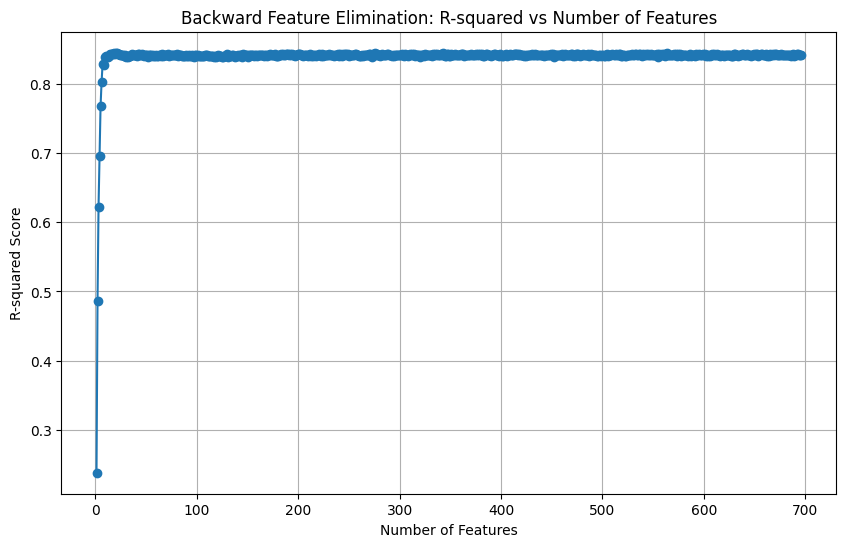

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Melbourne_housing.csv")

# Handle missing values by dropping rows with missing values
df_cleaned = df.dropna()

# Convert categorical variables into numerical values using OneHotEncoder
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Function to perform backward feature elimination
def backward_feature_elimination(X_train, X_test, y_train, y_test, model):
    features = X_train.columns.tolist()
    scores = []

    while len(features) > 0:
        # Train the model with current features
        model.fit(X_train[features], y_train)
        # Make predictions
        y_pred = model.predict(X_test[features])
        # Calculate and store the score (R-squared)
        r2 = r2_score(y_test, y_pred)
        scores.append((len(features), r2))

        # Get feature importances
        importances = model.feature_importances_
        # Create a DataFrame for feature importance
        importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        # Remove the least important feature
        least_important_feature = importance_df.nsmallest(1, 'Importance')['Feature'].values[0]
        features.remove(least_important_feature)

        print(f"Removed feature: {least_important_feature} | Remaining features: {len(features)}")

    return scores

# Run backward feature elimination
scores = backward_feature_elimination(X_train, X_test, y_train, y_test, model)

# Plot the results
num_features, r2_scores = zip(*scores)
plt.figure(figsize=(10, 6))
plt.plot(num_features, r2_scores, marker='o')
plt.title('Backward Feature Elimination: R-squared vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.grid()
plt.show()


Mean Squared Error: 61001763516.50514
R-squared: 0.8412286369113108

Feature Importances:
                              Feature  Importance
7                        BuildingArea    0.351192
693  Regionname_Southern Metropolitan    0.155328
8                           YearBuilt    0.116936
1                            Distance    0.072943
6                            Landsize    0.058142
..                                ...         ...
190                    Suburb_Kooyong    0.000000
381                SellerG_Commercial    0.000000
310                Suburb_Wattle Glen    0.000000
443                       SellerG_LJH    0.000000
375                   SellerG_Charter    0.000000

[696 rows x 2 columns]


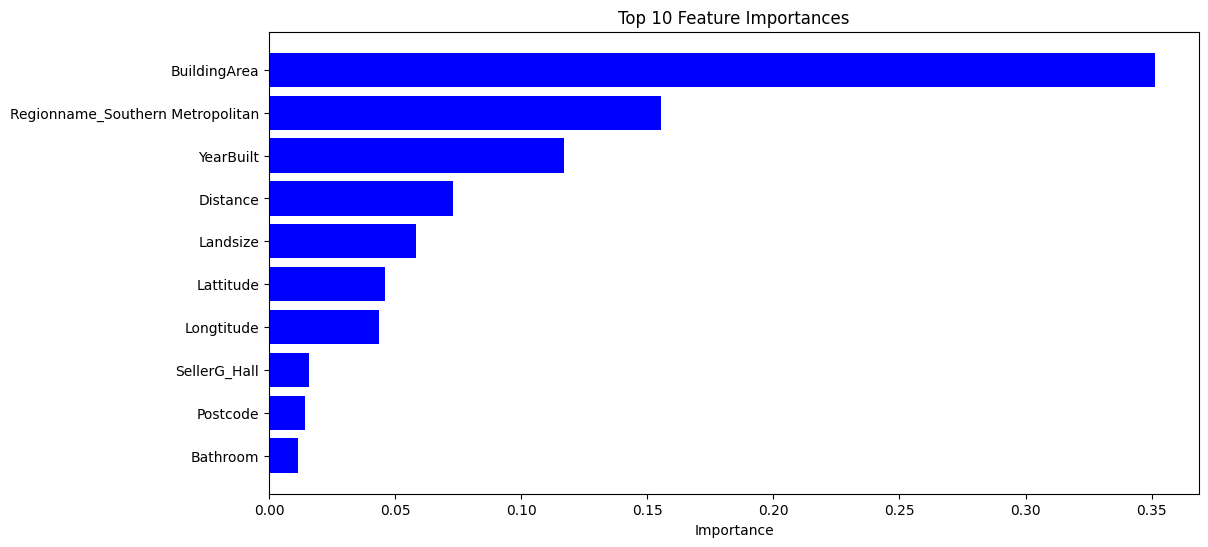


Mean Squared Error after removing least important features: 64720971018.42823
R-squared after removing least important features: 0.8315485291463897

Remaining features after removal: ['BuildingArea', 'Regionname_Southern Metropolitan', 'YearBuilt', 'Distance', 'Landsize', 'Lattitude', 'Longtitude', 'SellerG_Hall', 'Postcode', 'Bathroom']


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Melbourne_housing.csv")

# Handle missing values by dropping rows with missing values
df_cleaned = df.dropna()

# Convert categorical variables into numerical values using OneHotEncoder
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Function to remove least important features and assess model accuracy
def remove_least_important_features(X_train, X_test, y_train, y_test, model, feature_importance_df, threshold=0.01):
    # Keep features with importance above the threshold
    important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

    # Train and evaluate the model on selected features
    model.fit(X_train[important_features], y_train)
    y_pred_reduced = model.predict(X_test[important_features])

    mse_reduced = mean_squared_error(y_test, y_pred_reduced)
    r2_reduced = r2_score(y_test, y_pred_reduced)

    print(f"\nMean Squared Error after removing least important features: {mse_reduced}")
    print(f"R-squared after removing least important features: {r2_reduced}")
    return important_features

# Call the function to assess model accuracy after removing least important features
remaining_features = remove_least_important_features(X_train, X_test, y_train, y_test, model, feature_importance_df)
print("\nRemaining features after removal:", remaining_features)
